# **Applied Machine Learning**

## Health 14 Dataset: Disease Symptoms Prevention

In [66]:
# Import all necessary libraries
import  numpy               as      np
import  pandas              as      pd 
import  seaborn             as      sb
import  matplotlib          as      mpl
import  matplotlib.pyplot   as      plt

# Set high-resolution matplotlib plots
mpl.rcParams['figure.dpi'] = 300

# Scikit Learn Modules
from    sklearn.pipeline        import  Pipeline
from    sklearn.linear_model    import  LinearRegression
from    sklearn.model_selection import  train_test_split
from    sklearn.compose         import  ColumnTransformer
from    sklearn.neighbors       import  KNeighborsClassifier
from    sklearn.preprocessing   import  OneHotEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler, OneHotEncoder

In [67]:
# Load dataset into Pandas dataframes
df_Data=pd.read_csv('Dataset/dataset.csv')                  # Patient disease and symptoms data
df_Desc=pd.read_csv('Dataset/symptom_Description.csv')      # Descriptions of each disease
df_Prec=pd.read_csv('Dataset/symptom_precaution.csv')       # Precautions to take for each disease
df_Sev=pd.read_csv('Dataset/symptom_severity.csv')          # Severity weight of each symptom

In [68]:
# Show header of patient disease and symptoms data
df_Data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Show header of disease descriptions
df_Desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [70]:
# Show header of disease precautions
df_Prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [71]:
# Show header of symptom severity weights
df_Sev.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [89]:
# Count number of patients for which we have data
patients = df_Data['Disease'].count()
print("Number of Patients: \t\t", int(patients) )
# Count number of unique diseases
diseases_arr = df_Data['Disease'].unique()
print("Number of Diseases (Unique): \t", len(diseases_arr))
# Count frequency of each disease
counts = df_Data['Disease'].value_counts()[diseases_arr]
counts.head()

Number of Patients: 		 4920
Number of Diseases (Unique): 	 41


Disease
Fungal infection       120
Allergy                120
GERD                   120
Chronic cholestasis    120
Drug Reaction          120
Name: count, dtype: int64

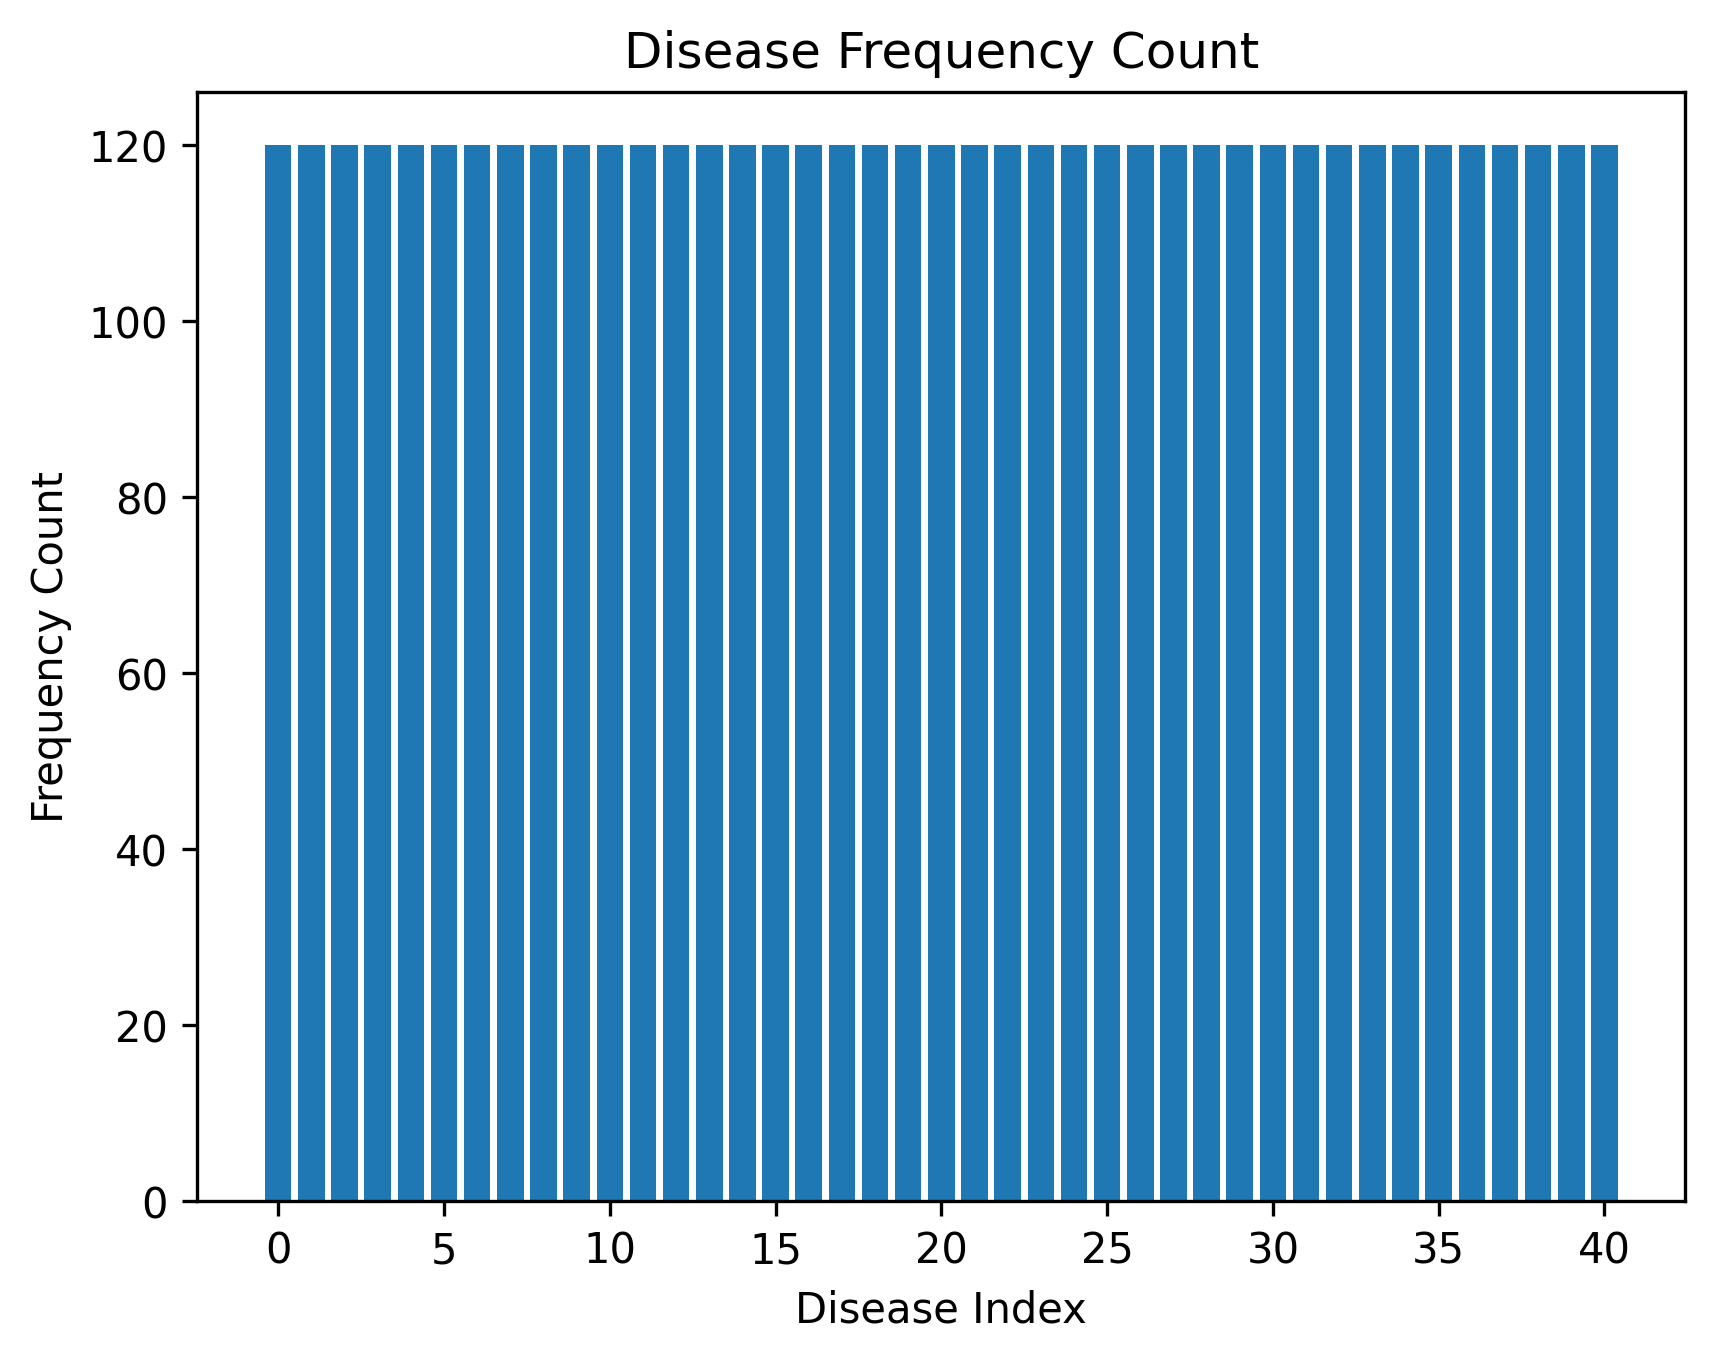

In [91]:
# Bar plot of frequency of each disease
plt.bar(x = range(len(counts)), height = counts)
# Remove x-axis ticks (too many)
plt.xticks()
# Axis labels
plt.xlabel("Disease Index")
plt.ylabel("Frequency Count")
# Plot title
plt.title("Disease Frequency Count")
# Show plot
plt.show()
plt.close()